In [28]:
# Import Libraries
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime


In [29]:
# Get Data
df = pd.read_csv('Tesla Stock Price (2010 to 2023).csv')
df.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
731,24/05/2013,6.173333,6.530000,6.133333,6.472000,6.472000,241863000
1470,02/05/2016,16.100000,16.212667,15.654667,16.120001,16.120001,57658500
1161,09/02/2015,14.358667,14.528667,14.132667,14.498667,14.498667,52086000
2741,19/05/2021,184.183334,188.736664,182.326660,187.820007,187.820007,118735200
2040,06/08/2018,23.030666,23.665333,22.788000,22.799334,22.799334,128464500


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3162 non-null   object 
 1   Open       3162 non-null   float64
 2   High       3162 non-null   float64
 3   Low        3162 non-null   float64
 4   Close      3162 non-null   float64
 5   Adj Close  3162 non-null   float64
 6   Volume     3162 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 173.1+ KB


In [31]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [32]:
df['Date']=pd.to_datetime(df['Date'],format='%d/%m/%Y')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3162 non-null   datetime64[ns]
 1   Open       3162 non-null   float64       
 2   High       3162 non-null   float64       
 3   Low        3162 non-null   float64       
 4   Close      3162 non-null   float64       
 5   Adj Close  3162 non-null   float64       
 6   Volume     3162 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 173.1 KB


In [34]:
# Check null value for data cleaning
df.isnull().sum().any()

np.False_

In [35]:
# Check Duplicate vale and drop if any
df.duplicated().sum().any()

np.False_

In [36]:
# Draw Candlestic for yearly movement
vs=go.Figure(data=[go.Candlestick(x=df['Date'],open=df['Open'],high=df['High'],low=df['Low'],close=df['Close'])])
vs.update_layout(title='Yearly Tesla Stock Price')
vs.show()

In [37]:
# plot 3d scatterplot for stock open, high and low
plt.Figure(figsize=(20,6))
fig = px.scatter_3d(df, x='Date', y='Open', z='Close',
              color='High')
fig.update_layout(title='Open Vs High Vs Close')
fig.show()

In [40]:
#Moving average for 50 and 200
df['MA50']=df['Adj Close'].rolling(window=50).mean()
print()
df['MA200']=df['Adj Close'].rolling(window=200).mean()
print()

KeyError: 'Adj Close'

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA200
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN,NaN
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,NaN,NaN
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,NaN,NaN
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,NaN,NaN
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,NaN,NaN


In [ ]:
# plot moving average
plt.figure(figsize=(11,6))
plt.plot(df['Adj Close'],label='Share Price',color='Orange')
plt.plot(df['MA50'],label='MA50',color='Green')
plt.plot(df['MA200'],label='MA200',color='Red')
plt.legend(loc='upper left')

KeyError: 'Adj Close'

<Figure size 1100x600 with 0 Axes>

In [ ]:
# Analysis For should buy or sell
buy_signal=[]
sell_signal=[]
trigger=0
for i in range(len(df)):
  if df['MA50'].iloc[i]>df['MA200'].iloc[i] and trigger !=1:
    buy_signal.append(df['Adj Close'].iloc[i])
    sell_signal.append(float('nan'))
    trigger=1
  elif df['MA200'].iloc[i]>df['MA50'].iloc[i] and trigger !=-1:
    sell_signal.append((df['Adj Close'].iloc[i]))
    buy_signal.append(float('nan'))
    trigger=-1
  else:
    buy_signal.append(float('nan'))
    sell_signal.append(float('nan'))

df['Sell Signals']= sell_signal
df['Buy Signals'] = buy_signal

df.head()






,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA200,Sell Signals,Buy Signals
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN,NaN,NaN,NaN
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,NaN,NaN,NaN,NaN
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,NaN,NaN,NaN,NaN
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,NaN,NaN,NaN,NaN
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,NaN,NaN,NaN,NaN


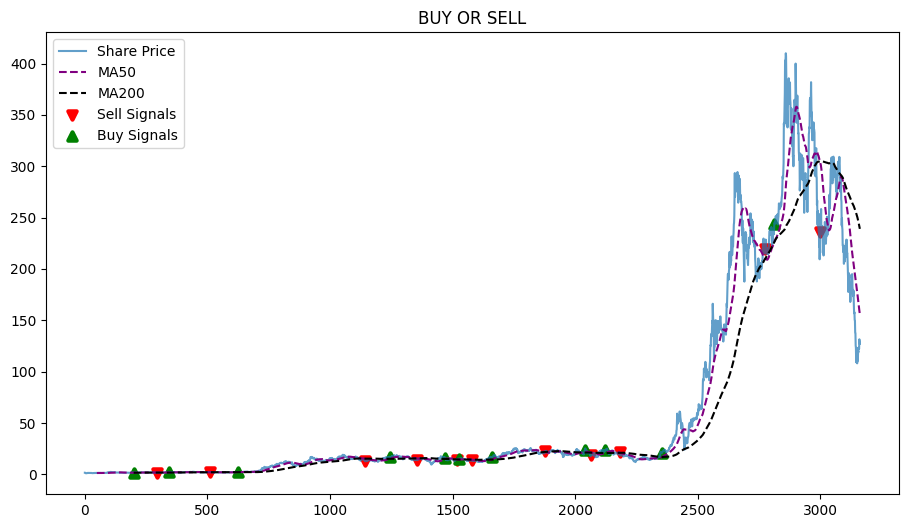

In [ ]:
# Plot buy or sell with the help of diagram
plt.figure(figsize=(11,6))
plt.plot(df['Adj Close'],label='Share Price',alpha=0.7)
plt.plot(df['MA50'],label='MA50',color='Purple',linestyle='--')
plt.plot(df['MA200'],label='MA200',color='Black', linestyle='--')
plt.scatter(df.index,df['Sell Signals'],label='Sell Signals',marker='v',lw=3,color='Red')
plt.scatter(df.index,df['Buy Signals'],label='Buy Signals',marker='^',lw=3,color='Green')
plt.title('BUY OR SELL')
plt.legend(loc='upper left')
